In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from matplotlib import pyplot as plt

## Exercise 1. Regression: order-$k$ polynomials

1. Convince yourself, that the least squares solution is $\hat w = (\Phi^T \Phi)^{-1} \Phi^Ty$.
2. What condition does the data matrix have to fulfill in order for the solution to exist?
3. Find the solution for $k=0$
4. Adding l2-regularizer, convince yourself that $\hat w = (\Phi^T \Phi + \lambda I)^{-1} \Phi^Ty$.

### Solution 1

1. Convince yourself, that the least squares solution is $\hat w = (\Phi^T \Phi)^{-1} \Phi^Ty$.

We optimize the following convex objective:

$\hat w = \arg \min_{w} \frac{1}{2} \Vert y - \Phi w \Vert^2$

It's equivalent to minimize the following, where we dropped terms not depending on w:

$\frac{1}{2} w^T \Phi^T \Phi w - w^T \Phi^T y$

Taking $\nabla_w$ and setting to 0:

$\Phi^T\Phi w = \Phi^Ty$

2. What condition does the data matrix have to fulfill in order for the solution to exist?

The system matrix $\Phi^T \Phi$ must have full rank. So the number of samples should be at least $k+1$.

3. Find the solution for $k=0$

If $k=0$, $\Phi$ is the constant $1$ vector. $\Phi^T\Phi = N$ and $\Phi^T y = \sum_i y_i$. Hence, $\hat w = \frac{1}{N} \sum_i y_i$, the average of the labels.

4. Adding l2-regularizer, convince yourself that $\hat w = (\Phi^T \Phi + \lambda I)^{-1} \Phi^Ty$.

Similar to 1., we add the regularizer and expand

$\hat w = \arg \min_{w} \frac{1}{2} \Vert y - \Phi w \Vert^2 + \frac{1}{2} \lambda \Vert w \Vert^2$

to

$\frac{1}{2} w^T \Phi^T \Phi w - w^T \Phi^T y + \frac{1}{2} \lambda w^T w$

## Exercise 2. Generalization Error and Regularization

Consider the input space $\mathcal{X} = [-1,1]$ and $\mathcal{Y} = \mathbb{R}$, and the following ground-truth function:

$y = f(x) = 0.1 x^3 - 0.025 x^2 + 0.01 x + 0.2$

1. Draw a random training set of size 25, using the following rule:

$y = f(x) + \epsilon, x \sim \text{Uniform}([-1,1]), \epsilon \sim \mathcal{N}(0, 10^{-4})$

2. Draw a test set of size 100 using the ground-truth function above.
3. Fit an order $k$ polynomial and plot train and test error vs $k$ for $k = {0, \ldots, 15}$. Use the mean squared error $l(y, \hat y) = \frac{1}{N} \sum_i (y_i - \hat y_i)^2$ to compute train and test errors
4. For different $k=0,3,15$, draw training sets of growing size: $N=25,250,2500$. Plot test error vs the number of training points.
5. Repeat 4, but fix $k=15$, and plot train and test error vs $\lambda={0, 0.1, 1000}$, the regularization strenght of the l2 penalty

### Solution 2

In [1]:
from mlcourse import *
import numpy as np
from matplotlib import pyplot as plt

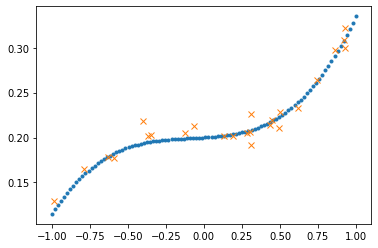

In [2]:
np.random.seed(12345)
N = 100
x_test = np.linspace(-1,1,N)
y_test = f_true(x_test)
plt.plot(x_test,y_test,'.')

x_train = np.sort(np.random.rand(25) * 2 - 1)
y_train = f_true(x_train) + np.random.randn(25) * 0.01
plt.plot(x_train, y_train, 'x')

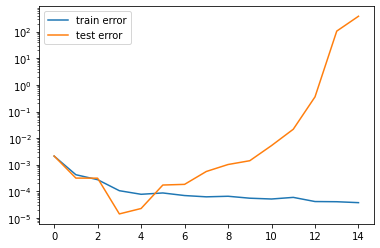

In [3]:
np.random.seed(12345)
ks = np.arange(15)
trials = 10 
train_errs = []
test_errs = []
for k in ks:
    train_err_trials = np.zeros(trials)
    test_err_trials = np.zeros(trials)
    for it in range(trials):
        
        x_train = np.random.rand(25) * 2 - 1
        y_train = f_true(x_train) + np.random.randn(25) * 0.01
        what = fit(x_train, y_train, k)
        yhat_train = predict(x_train, what)
        yhat_test = predict(x_test, what)
        train_err = mse(y_train, yhat_train)
        test_err = mse(y_test, yhat_test)
        train_err_trials[it] = train_err
        test_err_trials[it] = test_err
    train_errs.append(np.mean(train_err_trials))
    test_errs.append(np.mean(test_err_trials))
plt.semilogy(ks, train_errs, label='train error')
plt.semilogy(ks, test_errs, label='test error')
plt.legend()

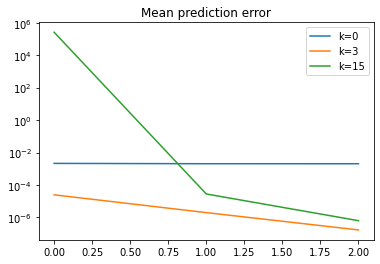

In [4]:
np.random.seed(12345)
ks = (0, 3, 15)
Ns = (25, 250,2500)
trials = 10
errors = np.zeros((len(Ns), len(ks), trials))

for it, k in enumerate(ks):
    for jt, N in enumerate(Ns):
        for kt in range(trials):
            x_train = np.random.rand(N) * 2 - 1
            y_train = f_true(x_train) + np.random.randn(N) * 0.01
            what = fit(x_train, y_train, k)
            yhat_test = predict(x_test, what)
            test_err = (mse(y_test, yhat_test))
            errors[jt, it, kt] = test_err
            
plt.figure()
for it, k in enumerate(ks):
    mu = np.mean(errors, 2)
    plt.semilogy(mu[:, it], label='k={}'.format(k))
plt.legend()
plt.title("Mean prediction error");
 

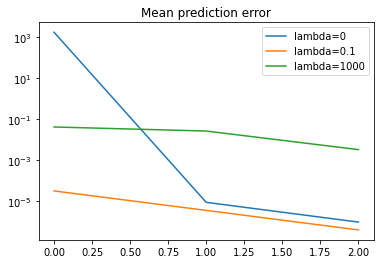

In [5]:
lambdas = [0, 0.1, 1000]
k = 15
Ns = (25, 250,2500)
trials = 10
errors = np.zeros((len(Ns), len(lambdas), trials))

for it, lam in enumerate(lambdas):
    for jt, N in enumerate(Ns):
        for kt in range(trials):
            x_train = np.random.rand(N) * 2 - 1
            y_train = f_true(x_train) + np.random.randn(N) * 0.01
            what = fit(x_train, y_train, k, lam)
            yhat_test = predict(x_test, what)
            test_err = (mse(y_test, yhat_test))
            errors[jt, it, kt] = test_err
            
plt.figure()
for it, l in enumerate(lambdas):
    mu = np.mean(errors, 2)
    plt.semilogy(mu[:, it], label='lambda={}'.format(l))
plt.legend()
plt.title("Mean prediction error");

## Exercise 3. GLMs, Logistic Regression

1. Convince yourself, that, if we encode the binary outcome as $Y \in {\pm 1}$, the (conditional) log-likelihood under the logistic regression model simplifies to:

$L(w) := \log P(Y \mid X, w) = \sum_i \log \sigma(y_i \Phi(x_i)^T w)$

2. Convince yourself, that $\sigma'(x) = \sigma(x) (1 - \sigma(x))$ for the logistic function. What is $\nabla_w L(w)$?
3. Fit a binary logistic regression model to the problem of distinguishing 4s vs 7s in the MNIST dataset.
4. Plot some samples in the training set, where the model is very confident and some samples where the model is not very confident.

### Solution 3

1. Convince yourself, that, if we encode the binary outcome as $Y \in {\pm 1}$, the (conditional) log-likelihood under the logistic regression model simplifies to:

Let $z:= f_{\theta}(x)$ and consider the individual likelihood terms:

$p_i^{y_i} (1-p_i)^{1-y_i}$ where $p_i = \sigma(z_i)$.
The term equals $\sigma(z) = \frac{1}{1+e^{-z}}$ if $y=1$ 
and $1-\sigma(z) = \frac{1}{1+e^{z}}$ if $y=0$. 
Hence, if we encode $y=0$ as $y=-1$, the likelihood term can be expressed as $\sigma(y z)$.

2. Convince yourself, that $\sigma'(x) = \sigma(x) (1 - \sigma(x))$ for the logistic function. What is $\nabla_w L(w)$?

$ \sigma(x)' = -(1 + e^{-x})^{-2} (-e^{-x}) = \sigma(x) \frac{1 + e^{-x} - 1}{1+e^{-x}} = \sigma(x) (1-\sigma(x))$

$\nabla_w L(w) = \sum_i \frac{1}{\sigma(y_i z_i)} \sigma(y_i z_i) (1-\sigma(y_i z_i)) y_i \Phi(x_i) = \sum_i  (1-\sigma(y_i z_i)) y_i \Phi(x_i)$

Intuitively, the gradient tries to make the weights more similar to the $i$-th sample, if the confidence at that samples is low.


In [6]:
import numpy as np
import cuml
from cuml.linear_model import LogisticRegression
#from sklearn.linear_model import LogisticRegression as sklLogisticRegression

import matplotlib.pyplot as plt
from timeit import default_timer
from cuml.model_selection import train_test_split
from cudf import Series
from scipy import stats
import cupy as cp

import sklearn
from sklearn.datasets import fetch_openml

# Download the data.
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False) 

TypeError: C function cuda.ccudart.cudaStreamSynchronize has wrong signature (expected __pyx_t_4cuda_7ccudart_cudaError_t (__pyx_t_4cuda_7ccudart_cudaStream_t), got cudaError_t (cudaStream_t))

In [48]:
# Move the data onto the device.
# Cupy implements the array interface that cuML understands, among other libraries. 
X_d = cp.asarray(X, dtype=cp.float32)
y_d = cp.asarray(y, dtype=cp.float32)

# Scale features to [0,1]
X_d /= 255.0

# Set up the binary classification problem 4 vs 7.
class_0 = 4
class_1 = 7
idx_ = cp.logical_or((y_d == class_0), (y_d == class_1))
X_ = X_d[idx_, :]
y_ = y_d[idx_]
y_[y_ == class_0] = 0.0
y_[y_ == class_1] = 1.0

# Prepare the train and test data.
X_train, X_test, y_train, y_test = train_test_split(X_, y_, random_state=77)

In [49]:
# Set up the model and learning algorithm.
params = {'penalty':'l2', 'C':1, 'tol':1e-4, 'fit_intercept': True, 'max_iter':2000, 'verbose':False}
cls = LogisticRegression(**params)

# Run the learning algorithm.
cls.fit(X_train, y_train)

# Evaluate the model.
print('cuML score train: {0:7.4f}, test: {1:7.4f}'.format(cls.score(X_train, y_train), cls.score(X_test, y_test)))

cuML score train:  0.9959, test:  0.9881


In [60]:
w = cls.coef_
b = cls.intercept_
z = (X_ @ w + b).get()

In [63]:
sidx = np.argsort(np.abs(z), axis=0)

[13403] [[0.499139]]
[12939] [[0.4983705]]
[12517] [[0.50233537]]
[8053] [[0.49099982]]
[6015] [[0.49044102]]
[6480] [[0.48875946]]
[2993] [[0.48574734]]
[1313] [[0.48572266]]
[5319] [[0.51563]]
[7088] [[0.48062986]]


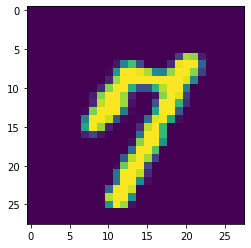

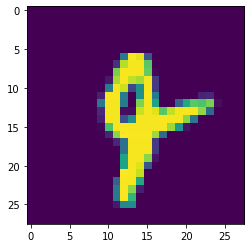

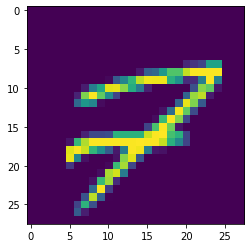

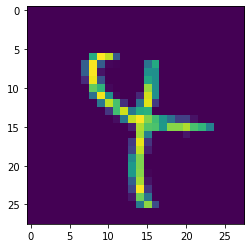

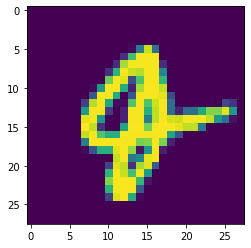

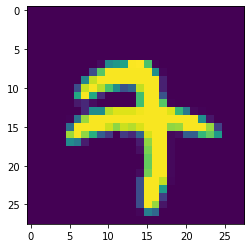

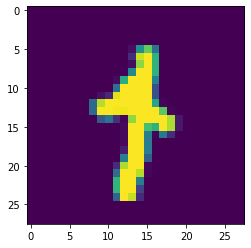

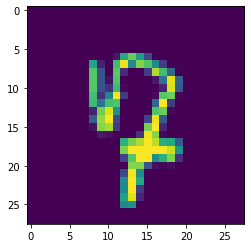

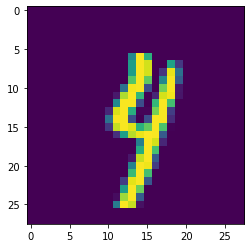

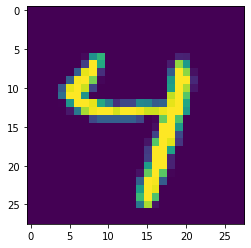

In [65]:
X_np = X_.get()
for idx in sidx[:10]:
    print(idx, 1/(1+np.exp(-z[idx])))
    plt.figure()
    plt.imshow(X_np[idx,:].reshape(28,28))

[8405] [[1.]]
[4364] [[1.]]
[1294] [[1.]]
[8503] [[1.]]
[8628] [[1.]]
[6963] [[1.]]
[11980] [[1.]]
[9284] [[1.]]
[621] [[1.]]
[2834] [[1.]]


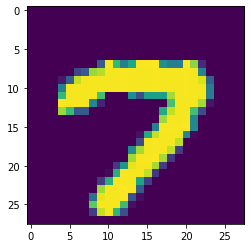

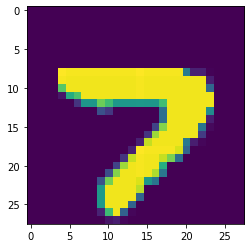

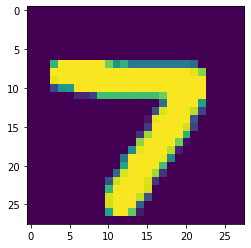

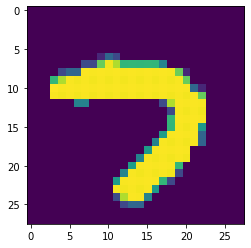

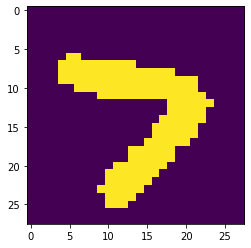

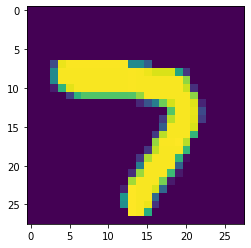

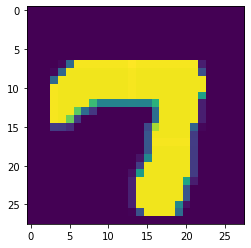

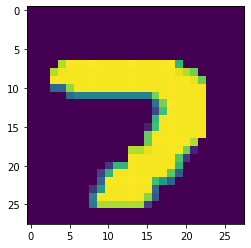

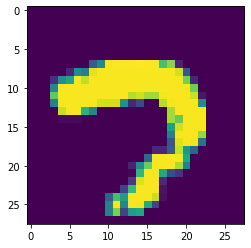

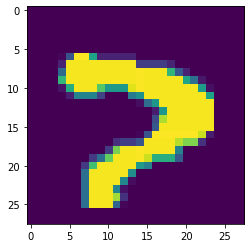

In [66]:
for idx in sidx[-10 :]:
    print(idx, 1/(1+np.exp(-z[idx])))
    plt.figure()
    plt.imshow(X_np[idx,:].reshape(28,28))

## Exercise 4. XGBoost 
 
1. Sketch the piece-wise constant function represented by the following trees on the domain $[-1,1]$
```
# Tree 1
     (0.15)
```
```
# Tree 2
     (x < 0)
     /     \
  (0.1)   (0.2)
```
```
# Tree 3
     (x < 0)
     /     \
  (0.1)   (x < 0.5)
          /       \
       (0.2)     (0.1) 
```


In [17]:
from mlcourse import *

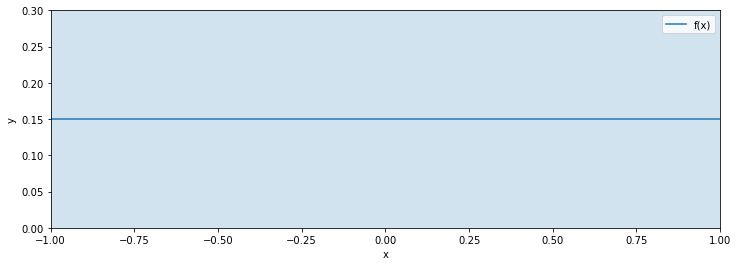

In [18]:
root = Node()
root.value = 0.15
y_test = pred1d([root], x_test)
plot_region1d(root, x_test, y_test)

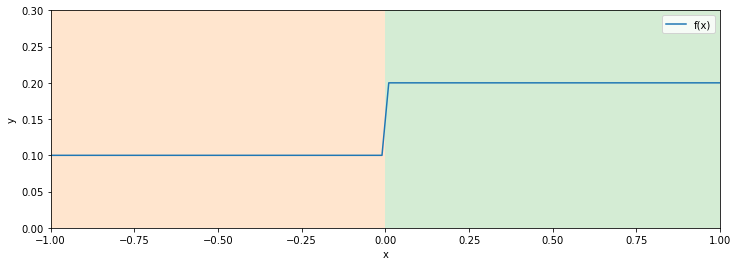

In [36]:
root = Node()
l = Node()
l.value = 0.1

r = Node()
r.value = 0.2 
root.value = 0
root.split = 0.0
root.left = l
root.right = r
y_test = pred1d([root], x_test)
plot_region1d(root, x_test, y_test)

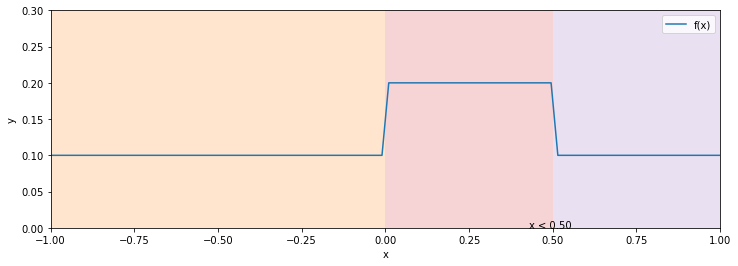

In [20]:
l = Node()
l.value = 0.1

r = Node()
r.split = 0.5
r.value = 0

rl = Node()
rl.value = 0.2

rr = Node()
rr.value = 0.1
r.left = rl
r.right =rr

root = Node()
root.split = 0.0
root.left = l
root.right = r

y_test = pred1d([root], x_test)

plot_region1d(root, x_test, y_test)

## Exercise 5

Given a set of training points $x_0 = -1, x_1=-0.5, x_2=0, x_3=0.5, x_4=1$. For the trees from Exercise 4, 
- determine the vector $w$
- evaluate the function $q$
- find the set $\mathcal{L}_n$ for all leaves $n$

## Solution 5

### Tree 1
- $L=1$ and $w$ is 0.15
- There is only one node, the root 0. Hence, $q(x) = 0$
- $\mathcal{L}_0 = {0,1,2,3,4}$

### Tree 2
- $L=2$, $w_0 = 0.1$, $w_1=0.2$
- $q(x_i) = 0$ for $i=0, 1$, and $q(x_i) = 1$ for $i=2,3,4$
- $\mathcal{L}_0 = {0,1}$
- $\mathcal{L}_1 = {2,3,4}$

### Tree 3
- $L=3$, $w_0 = 0.1$, $w_1=0.2$, $w_2=0.1$
- $q(x_i) = 0$ for $i=0, 1$, and $q(x_i) = 1$ for $i=2$, and $q(x_i) = 2$ for $i=3,4$
- $\mathcal{L}_0 = {0,1}$
- $\mathcal{L}_1 = {2}$
- $\mathcal{L}_2 = {3,4}$


In [82]:
import numpy as np
import cudf
import cuml
from cuml.linear_model import LogisticRegression
from cuml import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt

# The dataset is publicly available under the following URL:
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00280/HIGGS.csv.gz
# But we downloaded it for you :)
#dataset_path = '/scratch/snx3000/datasets/uci.edu/HIGGS.csv.gz'
dataset_path = '/data/projects/SummerUniversity2022/ml_rapids/HIGGS.csv.gz'

gdf = cudf.read_csv(dataset_path, dtypes=[np.float32] * 29, header=None)
gdf.head()


X_higgs, y_higgs = gdf.iloc[:,1:], gdf.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X_higgs.values, y_higgs.values, test_size=0.2, random_state=123)

In [106]:
# logistic regression
mu = X_train.mean(keepdims=True)
sigma = X_train.std(keepdims=True)
X_train_std = (X_train - mu) / sigma
X_test_std = (X_test - mu) / sigma

params = {'penalty':'l2', 'C':1, 'tol':1e-4, 'fit_intercept': True, 'max_iter':2000, 'verbose':False}

cls = LogisticRegression(**params)

cls.fit(X_train_std, y_train)
print('Log.Reg score train: {0:7.4f}, test: {1:7.4f}'.format(cls.score(X_train_std, y_train), cls.score(X_test_std, y_test)))

Log.Reg score train:  0.6418, test:  0.6414


In [109]:
# XGBoost
dtrain = xgb.DMatrix(
        X_train_std,
        y_train    )

dtest = xgb.DMatrix(
        X_test_std,
        y_test    )

## Train the model
trained_model = xgb.train(
                        {
                          'learning_rate': 0.75,
                          'max_depth': 6,
                          'objective': 'binary:logistic',
                          #'silent': True,
                          #'verbose_eval': True,
                          'tree_method':'gpu_hist',
                          'eval_metric' :['error'],
                        },
                        dtrain,
                        num_boost_round=384, evals=[(dtrain, 'train'), (dtest, 'validation')])

pred_train = trained_model.predict(dtrain) > 0.5
pred_test = trained_model.predict(dtest) > 0.5
print('XGBoost score train: {0:7.4f}, test: {1:7.4f}'.format(cuml.metrics.accuracy_score(y_train, pred_train),
                                                             cuml.metrics.accuracy_score(y_test, pred_test)))

[0]	train-error:0.31991	validation-error:0.31972
[1]	train-error:0.30770	validation-error:0.30803
[2]	train-error:0.29946	validation-error:0.29990
[3]	train-error:0.29272	validation-error:0.29331
[4]	train-error:0.28977	validation-error:0.29014
[5]	train-error:0.28759	validation-error:0.28789
[6]	train-error:0.28595	validation-error:0.28650
[7]	train-error:0.28362	validation-error:0.28403
[8]	train-error:0.28237	validation-error:0.28277
[9]	train-error:0.28058	validation-error:0.28112
[10]	train-error:0.27877	validation-error:0.27933
[11]	train-error:0.27805	validation-error:0.27870
[12]	train-error:0.27710	validation-error:0.27783
[13]	train-error:0.27556	validation-error:0.27629
[14]	train-error:0.27472	validation-error:0.27547
[15]	train-error:0.27426	validation-error:0.27510
[16]	train-error:0.27327	validation-error:0.27411
[17]	train-error:0.27293	validation-error:0.27380
[18]	train-error:0.27217	validation-error:0.27296
[19]	train-error:0.27141	validation-error:0.27223
[20]	train

[163]	train-error:0.24747	validation-error:0.25158
[164]	train-error:0.24735	validation-error:0.25150
[165]	train-error:0.24729	validation-error:0.25149
[166]	train-error:0.24718	validation-error:0.25145
[167]	train-error:0.24708	validation-error:0.25140
[168]	train-error:0.24703	validation-error:0.25132
[169]	train-error:0.24694	validation-error:0.25132
[170]	train-error:0.24668	validation-error:0.25109
[171]	train-error:0.24658	validation-error:0.25107
[172]	train-error:0.24647	validation-error:0.25093
[173]	train-error:0.24636	validation-error:0.25089
[174]	train-error:0.24624	validation-error:0.25065
[175]	train-error:0.24612	validation-error:0.25057
[176]	train-error:0.24609	validation-error:0.25053
[177]	train-error:0.24599	validation-error:0.25054
[178]	train-error:0.24596	validation-error:0.25044
[179]	train-error:0.24592	validation-error:0.25041
[180]	train-error:0.24582	validation-error:0.25045
[181]	train-error:0.24576	validation-error:0.25038
[182]	train-error:0.24570	valid

[324]	train-error:0.23848	validation-error:0.24624
[325]	train-error:0.23844	validation-error:0.24622
[326]	train-error:0.23837	validation-error:0.24620
[327]	train-error:0.23830	validation-error:0.24621
[328]	train-error:0.23826	validation-error:0.24622
[329]	train-error:0.23822	validation-error:0.24623
[330]	train-error:0.23817	validation-error:0.24621
[331]	train-error:0.23817	validation-error:0.24618
[332]	train-error:0.23811	validation-error:0.24617
[333]	train-error:0.23805	validation-error:0.24609
[334]	train-error:0.23802	validation-error:0.24609
[335]	train-error:0.23795	validation-error:0.24608
[336]	train-error:0.23791	validation-error:0.24609
[337]	train-error:0.23788	validation-error:0.24603
[338]	train-error:0.23784	validation-error:0.24605
[339]	train-error:0.23782	validation-error:0.24602
[340]	train-error:0.23780	validation-error:0.24600
[341]	train-error:0.23773	validation-error:0.24603
[342]	train-error:0.23770	validation-error:0.24597
[343]	train-error:0.23769	valid